# Pytorch中的优化器

<center><b>Pytorch中的优化器</b></center>

|  函数   | 描述  |
|  :----  | :----  |
|  torch.optim.Adadelta()  | Adadelta算法 |
|  torch.optim.Adagrad()  | Adagrad算法 |
|  torch.optim.Adam()  | Adam算法 |
|  torch.optim.Adamax()  | Adamax算法 |
|  torch.optim.ASGD()  | 平均随机梯度下降算法 |
|  torch.optim.LBFGS()  | L-BFGS算法 |
|  torch.optim.RMSprop()  | RMSprop算法 |
|  torch.optim.Rprop()  | 弹性反向传播算法 |
|  torch.optim.SGD()  | 随机梯度下降算法 |

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam

In [2]:
# # Adam类的使用方式
# torch.optim.Adam(params,  # 待优化参数的iterable或定义了参数组的dict，通常为model.parameters
#                  lr=0.001,  # 算法学习率，默认为0.001
#                  betas=(0.9, 0.999),  # 用于计算梯度以及梯度平方的运行平均值的系数，默认为(0.9, 0.999)
#                  eps=1e-08,  # 为了增加数值计算发稳定性而加到分母里的项，默认为1e-08
#                  weight_decay=0) # 权重衰减（L2惩罚），默认为0

In [3]:
# 建立一个测试网络
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet, self).__init__()

        # 定义隐藏层
        self.hidden = nn.Sequential(
            nn.Linear(13, 10),
            nn.ReLU(),
        )

        # 定义预测回归层
        self.regression = nn.Linear(10, 1)

    # 定义网络的向前传播路径
    def forward(self, x):
        x = self.hidden(x)
        output = self.regression(x)

        # 输出为output
        return output


# 输出我们的网络结构
testnet = TestNet()
print(testnet)

TestNet(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


In [4]:
# 定义优化器方式1：为不同的层定义统一的学习率
optimizer = Adam(
    testnet.parameters(),  # 表示对testnet网络中的所有需要优化的参数进行更新优化
    lr=0.001 # 学习率统一使用0.001
)

In [5]:
# 定义优化器方式2：为不同的层定义不同的学习率
optimizer = Adam(
    [{"params": testnet.hidden.parameters(), "lr": 0.0001}, # 使用params关键字指定需要优化层的权重参数，学习率为0.0001
     {"params": testnet.regression.parameters(), "lr": 0.01}], # 学习率为0.01
    lr=1e-2 # 作用于testnet中其他没有特殊指定的所有参数
)

In [6]:
# # 对目标函数进行优化时通常的格式
# for input,target in datasets:
#     optimizer.zero_grad() # 梯度清零
#     output = testnet(input) # 计算预测值
#     loss = loss_fn(output,target) # 计算损失
#     loss.backward() # 损失后向传播
#     optimizer.step() # 更新网络参数

<center><b>Pytorch中的优化器学习率调整方式</b></center>

In [7]:
# 见书66页

In [8]:
# scheduler = ... # 设置学习率调整方式
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step() # 更新学习率
# 设置学习率调整方法的类，一般是再网络的训练前，而学习率的调整则是再网络的训练过程中，并通过scheduler.step()来更新

# Pytorch中的损失函数

<center><b>Pytorch中的常用损失函数</b></center>

|  类   | 算法名称  | 适用问题类型 |
|  :----  | :----  | :----  |
|  torch.nn.L1Loss()  | 平均绝对值误差损失 | 回归 |
|  torch.nn.MSEoss()  | 均方误差损失 | 回归 |
|  torch.nn.CrossEntropyLoss()  | 交叉熵损失 | 多分类 |
|  torch.nn.NLLLoss()  | 负对数似然函数损失 | 多分类 |
|  torch.nn.NLLLoss2d()  | 图片负对数似然函数损失 | 图像分割 |
|  torch.nn.KLDivLoss()  | KL散度损失 | 回归 |
|  torch.nn.BCELoss()  | 二分类交叉熵损失 | 二分类 |
|  torch.nn.MarginRankingLoss()  | 评价相似度的损失 |  |
|  torch.nn.MultiLabelMarginLoss()  | 多标签分类的损失 | 多标签分类 |
|  torch.nn.SmoothL1Loss()  | 平滑的L1损失 | 回归 |
|  torch.nn.SoftMarginLoss()  | 多标签二分类问题的损失 | 多标签二分类 |

## 均方误差损失

In [9]:
torch.nn.MSELoss(
    size_average=None,
    reduce=None,
    reduction='mean'
)

MSELoss()

- size_average：默认为True。计算的损失为每个batch的均值，否则为每个batch的和。以后将会弃用该参数，可以通过设置reduction来代替该参数的效果。
- reduce：默认为True，此时计算的损失会根据size_average参数设定，是计算每个batch的均值或和。以后将会弃用该参数。
- reduction：通过指定参数取值为none、mean、sum来判断损失的计算方式。默认为mean，即计算的损失为每个batch的均值；如果设置为sum，则计算的损失为每个batch的和；如果设置为none，则表示不使用该参数

## 交叉熵损失

In [10]:
torch.nn.CrossEntropyLoss(
    weight=None,
    size_average=None,
    ignore_index=100,
    reduce=None,
    reduction='mean'
)

CrossEntropyLoss()

- weight：是1维的张量，包含n个元素，分别代表n类的权重，在训练样本不均衡时非常有用，默认值为None。
- size_average：同上
- reduction：同上
- reduce：同上
- ignore_index：指定被忽略且对输入梯度没有贡献的目标值

# 防止过拟合

In [11]:
# 见书68-71页

# 网络参数初始化

## 常用的参数初始化方法

<center><b>常用的初始化方法的功能</b></center>

|  类   | 算法名称  |
|  :----  | :----  |
|  nn.init.uniform_(tesnsor,a=0.0,b=1.0)  | 从均匀分布U(a,b)中生成值，填充输入的张量或变量 |
|  nn.init.normal_(tesnsor,mean=0.0,std=1.0)  | 从给定均值mean和标准差std的正态分布中生成值，填充输入的张量或变量 |
|  nn.init.constant_(tesnsor,val)  | 用val的值填充输入的张量或变量 |
|  nn.init.eye_(tesnsor)  | 用单位矩阵来填充输入的二维张量或变量 |
|  nn.init.dirac_(tesnsor)  | 用Dirac delta函数来填充[3,4,5]维输入张量或变量，在卷积层尽可能多的保存输入通道特性 |
|  nn.init.xavier_uniform_(tesnsor,gain=1.0)  | 使用Glorot initialization方法正态分布生成值，生成随机数填充张量 |
|  nn.init.xavier_normal_(tesnsor,gain=1.0)  | 使用Glorot initialization方法正态分布生成值，生成随机数填充张量 |
|  nn.init.kaiming_uniform_(tesnsor,a=0,mode='fan_in',nonlinearity='leaky_relu')  | 使用He initialization方法正态分布生成值，生成随机数填充张量 |
|  nn.init.kaiming_normal_(tesnsor,a=0,mode='fan_in',nonlinearity='leaky_relu')  | 使用He initialization方法正态分布生成值，生成随机数填充张量 |
|  nn.init.orthogonal_(tesnsor,gain=1.0)  | 使用正交矩阵填充张量进行初始化 |

## 参数初始化方法应用实例

### 针对某一层的权重进行初始化

C:\Users\13259\AppData\Local\Temp\ipykernel_3488\277161067.py:7: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(conv1.weight, mean=0, std=1) # conv1.weight获取conv1卷积层初始权值参数


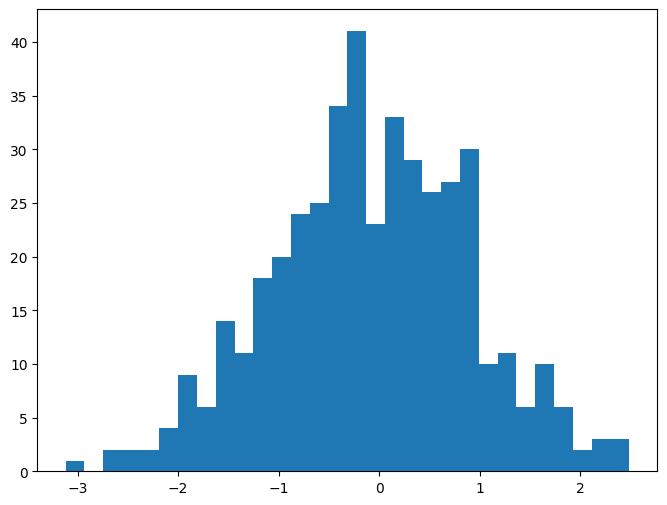

In [12]:
# 针对某一层的权重进行初始化
import matplotlib.pyplot as plt
conv1 = torch.nn.Conv2d(3, 16, 3)

# 使用正态分布初始化权重
torch.manual_seed(12)  # 随机数初始化种子
torch.nn.init.normal(conv1.weight, mean=0, std=1) # conv1.weight获取conv1卷积层初始权值参数

# 使用直方图可视化conv1.weight的分布情况
plt.figure(figsize=(8, 6))
plt.hist(conv1.weight.data.numpy().reshape(-1, 1), bins=30)
plt.show()

In [13]:
# 通过conv1.bias可以获取该层的偏置参数
# 使用指定值初始化偏置
torch.nn.init.constant(conv1.bias, val=0.1)

C:\Users\13259\AppData\Local\Temp\ipykernel_3488\4279711680.py:3: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  torch.nn.init.constant(conv1.bias, val=0.1)


Parameter containing:
tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000],
       requires_grad=True)

### 针对一个网络的权重初始化方法

In [14]:
# 建立一个测试网络
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.hidden = nn.Sequential(
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
        )
        self.cla = nn.Linear(50, 10)

    # 定义网络的前向传播路径
    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.shape[0], -1)
        x = x.hidden(x)
        output = self.cla(x)
        return output

# 输出网络结构
testnet = TestNet()
print(testnet)

TestNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (hidden): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
  )
  (cla): Linear(in_features=50, out_features=10, bias=True)
)


In [15]:
# 定义网络中的每个层进行权重初始化的函数
def init_weights(m):
    # 如果是卷积层
    if type(m) == nn.Conv2d:
        torch.nn.init.normal(m.weight,mean=0,std=0.5)
    
    # 如果是全连接层
    if type(m) == nn.Linear:
        torch.nn.init.uniform(m.weight,a=0.1,b=0.1)
        m.bias.data.fill_(0.01)

In [16]:
# 使用网络的apply方法进行权重初始化
torch.manual_seed(13)
testnet.apply(init_weights)

C:\Users\13259\AppData\Local\Temp\ipykernel_3488\3660152606.py:5: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(m.weight,mean=0,std=0.5)
C:\Users\13259\AppData\Local\Temp\ipykernel_3488\3660152606.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  torch.nn.init.uniform(m.weight,a=0.1,b=0.1)


TestNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (hidden): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
  )
  (cla): Linear(in_features=50, out_features=10, bias=True)
)

# PyTorch中定义网络的方式

In [17]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.utils.data as Data
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 数据准备

boston_X.dtype: float64


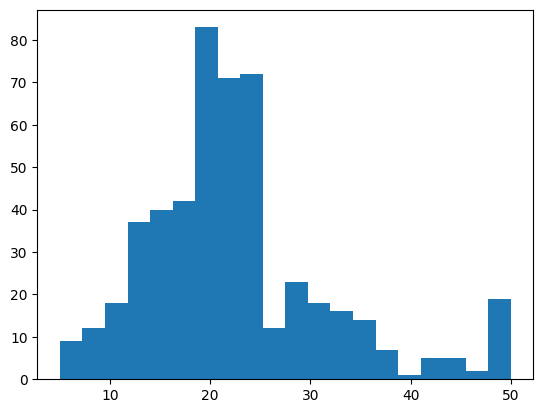

In [18]:
# 读取波士顿回归数据
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_y= raw_df.values[1::2, 2]

print("boston_X.dtype:", boston_X.dtype)
# print("boston_Y.dtype:", boston_Y.dtype)

plt.figure()
plt.hist(boston_y, bins=20)
plt.show()

In [19]:
# 数据标准化处理
ss = StandardScaler(with_mean=True, with_std=True)
boston_Xs = ss.fit_transform(boston_X)

# 将数据预处理为可以使用PyTorch进行批量训练的形式
# 训练集X转化为张量
train_xt = torch.from_numpy(boston_Xs.astype(np.float32))

# 训练集y转化为张量
train_yt = torch.from_numpy(boston_y.astype(np.float32))

# 将训练集转化为张量后，使用TensorDaataSet将X和y整理到一起
train_data = Data.TensorDataset(train_xt, train_yt)

# 定义一个数据加载器，将训练数据集进行批量处理
train_loader = Data.DataLoader(
    dataset=train_data,
    batch_size=128,  # 批处理样本大小
    shuffle=True,
    num_workers=1,
)

## 网络定义与训练方式1

In [20]:
# 使用继承Module的方式定义全连接神经网络
class MLPmodel(nn.Module):
    def __init__(self):
        super(MLPmodel, self).__init__()
        # 定义第一个隐藏层
        self.hidden1 = nn.Linear(
            in_features=13,  # 第一个隐藏层的输入，数据的特征数
            out_features=10,  # 第一个隐藏层的输出，神经元的数量
            bias=True,  # 默认会有偏置
        )
        self.active1 = nn.ReLU()

        # 定义第二个隐藏层
        self.hidden2 = nn.Linear(10, 10)
        self.active2 = nn.ReLU()

        # 定义预测回归层
        self.regression = nn.Linear(10, 1)

    # 定义网络的前向传播路径
    def forward(self, x):
        x = self.hidden1(x)
        x = self.active1(x)
        x = self.hidden2(x)
        x = self.active2(x)
        output = self.regression(x)
        # 输出为output
        return output

In [21]:
# 输出我们的网络结构
mlp1 = MLPmodel()
print(mlp1)

MLPmodel(
  (hidden1): Linear(in_features=13, out_features=10, bias=True)
  (active1): ReLU()
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (active2): ReLU()
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


In [22]:
# 对回归模型mlp1进行训练并输出损失函数的变化情况，定义优化器和损失函数
optimizer = SGD(mlp1.parameters(), lr=0.001) # mlp1.parameters()获取需要优化的参数
loss_func = nn.MSELoss()  # 最小均方根误差
train_loss_all = []  # 输出每个批次训练的损失函数

# 进行训练，并输出每次迭代的损失函数
for epoch in range(30):
    # 对训练数据的加载器进行迭代计算
    for step, (b_x, b_y) in enumerate(train_loader):
        output = mlp1(b_x).flatten()  # MLP在训练batch上的输出
        train_loss = loss_func(output, b_y)  # 均方根误差
        optimizer.zero_grad()  # 每个迭代步的梯度初始化为0
        train_loss.backward()  # 损失的后向传播，计算梯度
        optimizer.step()  # 使用梯度进行优化
        train_loss_all.append(train_loss.item())

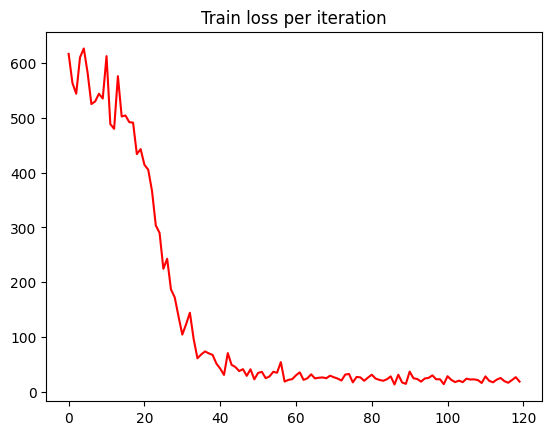

In [23]:
# 可视化
plt.figure()
plt.plot(train_loss_all, 'r-')
plt.title('Train loss per iteration')
plt.show()

## 网络定义与训练方式2

In [24]:
# 使用定义网络时使用nn.Sequential的形式
class MLPmodel2(nn.Module):
    def __init__(self):
        super(MLPmodel2, self).__init__()

        # 定义隐藏层
        self.hidden = nn.Sequential(
            nn.Linear(13, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
        )

        # 预测回归层
        self.regerssion = nn.Linear(10, 1)

    # 定义网络的前向传播路径
    def forward(self, x):
        x = self.hidden(x)
        output = self.regerssion(x)
        return output

In [25]:
# 输出网络结构
mlp2 = MLPmodel2()
print(mlp2)

MLPmodel2(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (regerssion): Linear(in_features=10, out_features=1, bias=True)
)


In [26]:
# 对回归模型mlp2进行训练并输出损失函数的变化情况，定义优化器和损失函数
optimizer = SGD(mlp2.parameters(), lr=0.001) # mlp1.parameters()获取需要优化的参数
loss_func = nn.MSELoss()  # 最小均方根误差
train_loss_all = []  # 输出每个批次训练的损失函数

# 进行训练，并输出每次迭代的损失函数
for epoch in range(30):
    # 对训练数据的加载器进行迭代计算
    for step, (b_x, b_y) in enumerate(train_loader):
        output = mlp2(b_x).flatten()  # MLP在训练batch上的输出
        train_loss = loss_func(output, b_y)  # 均方根误差
        optimizer.zero_grad()  # 每个迭代步的梯度初始化为0
        train_loss.backward()  # 损失的后向传播，计算梯度
        optimizer.step()  # 使用梯度进行优化
        train_loss_all.append(train_loss.item())

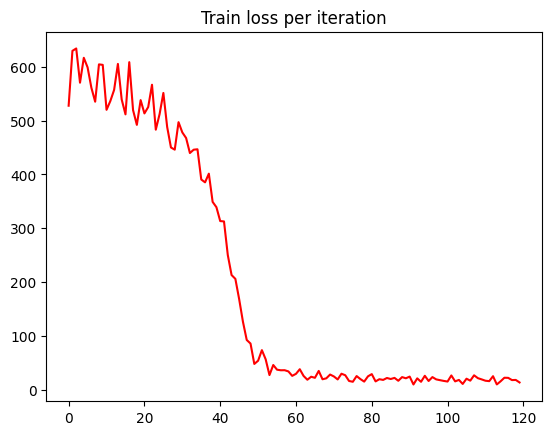

In [27]:
# 可视化
plt.figure()
plt.plot(train_loss_all, 'r-')
plt.title('Train loss per iteration')
plt.show()

# PyTorch模型保存和加载方法

## 保存整个模型

In [28]:
# 保存整个模型
torch.save(mlp2,"./data/model/chapter3/mlp2.pkl")

In [29]:
# 导入保存的模型
mlp2load = torch.load("./data/model/chapter3/mlp2.pkl")
mlp2load

MLPmodel2(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (regerssion): Linear(in_features=10, out_features=1, bias=True)
)

## 只保存模型的参数

In [30]:
# 只保存模型的参数
torch.save(mlp2.state_dict(),"./data/model/chapter3/mlp2_param.pkl")

In [31]:
# 导入保存的模型
mlp2param = torch.load("./data/model/chapter3/mlp2_param.pkl")
mlp2param

OrderedDict([('hidden.0.weight',
              tensor([[-0.3605, -0.3495,  0.2615,  0.2332,  0.1727, -0.0395,  0.2585, -0.3274,
                       -0.2525,  0.1378,  0.2821, -0.1396, -0.4217],
                      [-0.1320,  0.0813, -0.4602, -0.2582,  0.0542,  0.5068, -0.0875,  0.2929,
                       -0.0686, -0.4235,  0.0194,  0.3613, -0.2599],
                      [-0.0300,  0.0204, -0.0974,  0.2729, -0.1523,  0.0348,  0.1997, -0.1916,
                       -0.1344, -0.3763, -0.1186,  0.2572,  0.1414],
                      [ 0.0108, -0.2400, -0.1799,  0.1269, -0.0605, -0.0507,  0.0723,  0.0228,
                        0.0488,  0.2500, -0.2315, -0.2478,  0.1953],
                      [-0.3465,  0.1413,  0.1085,  0.3471,  0.1352, -0.1273, -0.1399,  0.1126,
                        0.1440, -0.0269,  0.1851,  0.1877,  0.0143],
                      [-0.2506,  0.2454,  0.2060, -0.0267,  0.0856, -0.1013,  0.1004,  0.1431,
                        0.3168,  0.2617, -0.0846, -0